In [1]:
from configs import merged_cycle_data_file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

one_day_secs = 24 * 60 * 60 # 1 day in seconds
def print_hist_labels(hist):
    for p in hist.patches:
        y_value = p.get_height()
        x_value = p.get_x() + p.get_width() / 2

        label = y_value
        hist.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, 10),             # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='top',                   # Vertically center label
            ha='center')

In [2]:
# check if we have a cached file
import os
output = 'analysis.csv'
if not os.path.isfile(output):
    print(f'{output} file not found')
    p = 0.05  # 5% of the lines
    df = pd.read_csv(
        merged_cycle_data_file,
        index_col='Rental Id',
        parse_dates=['End Date', 'Start Date'],
        header=0,
        skiprows=lambda i: i>0 and random.random() > p)
    df.to_csv(output)
else:
    print(f'Found file {output}')
    df = pd.read_csv(
        output,
        index_col='Rental Id',
        parse_dates=['End Date', 'Start Date']
    )
init_df = df.copy()

analysis.csv file not found


/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# drop rows with missing data
print('Old size:', len(df))
df = df.dropna()
print('New size:', len(df))

Old size: 2377757
New size: 2369507


In [4]:
df['EndStation Id'] = df['EndStation Id'].map(int)
df.dtypes

Duration                  float64
End Date           datetime64[ns]
EndStation Id               int64
Start Date         datetime64[ns]
StartStation Id             int64
dtype: object

In [5]:
df.head()

,Duration,End Date,EndStation Id,Start Date,StartStation Id
Rental Id,,,,,
50754227,1200.0,2016-10-01 00:20:00,272,2016-10-01 00:00:00,425
50754232,480.0,2016-10-01 00:11:00,780,2016-10-01 00:03:00,755
50754241,180.0,2016-10-01 00:11:00,78,2016-10-01 00:08:00,264
50754248,300.0,2016-10-01 00:14:00,400,2016-10-01 00:09:00,116
50754264,300.0,2016-10-01 00:20:00,606,2016-10-01 00:15:00,337


In [6]:
df.describe()

,Duration,EndStation Id,StartStation Id
count,2.369507e+06,2.369507e+06,2.369507e+06
mean,1.277110e+03,1.128346e+03,7.771705e+02
std,7.589262e+03,1.366008e+04,1.003652e+04
min,-3.120000e+03,1.000000e+00,1.000000e+00
25%,4.800000e+02,1.570000e+02,1.590000e+02
50%,8.400000e+02,3.210000e+02,3.250000e+02
75%,1.260000e+03,5.570000e+02,5.570000e+02
max,2.159880e+06,3.002490e+05,3.002490e+05


Text(0.5, 1.0, 'Duration distribution')

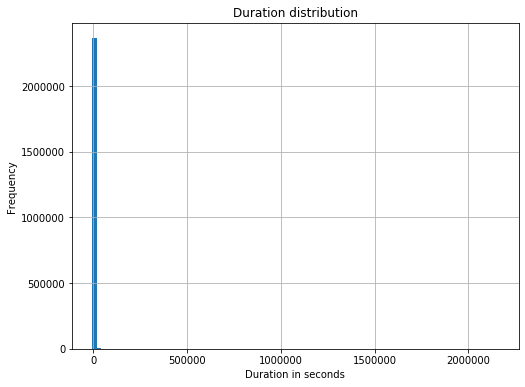

In [7]:
df['Duration'].hist(bins=100, figsize=(8,6))
# it looks like we have some outliers
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
plt.title('Duration distribution')

In [8]:
len(df[(df['Duration'] > one_day_secs) | (df['Duration'] < 0)])

817

In [9]:
# there are rows where the 'Duration' value does not match the difference between 'End Date' and 'Start Date'
# also, there are rows where 'Start Date' is after 'End Date'
diff = df['End Date'] - df['Start Date']
seconds = diff.map(lambda x: x.total_seconds())
df = df[(df['Duration'] == seconds) & (seconds >= 0)]

Text(0.5, 1.0, 'Duration distribution')

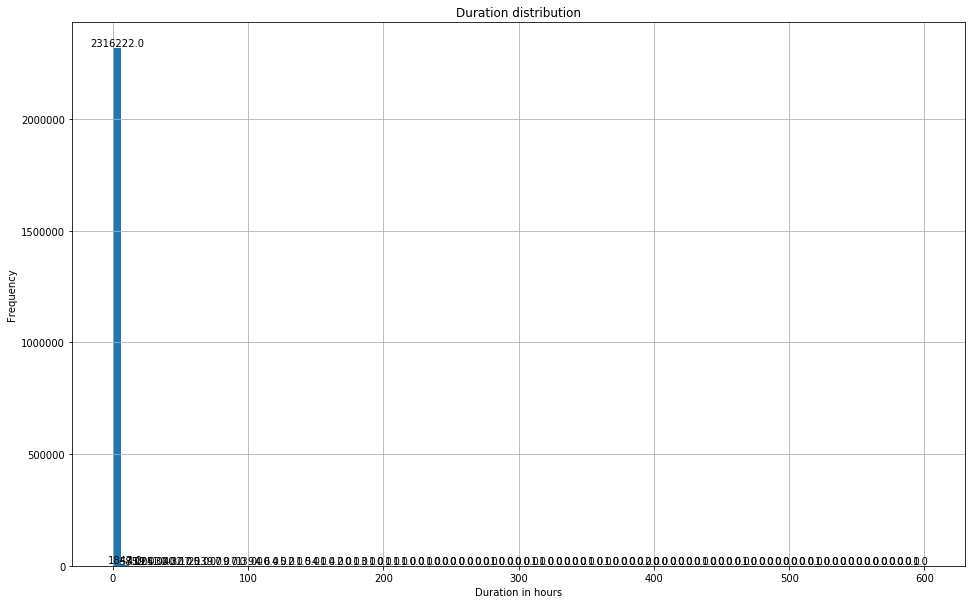

In [10]:
hist = df['Duration'].map(lambda x: x / 3600).hist(bins=100, figsize=(16,10))
print_hist_labels(hist)
plt.xlabel('Duration in hours')
plt.ylabel('Frequency')
plt.title('Duration distribution')

Text(0.5, 1.0, 'Duration distribution')

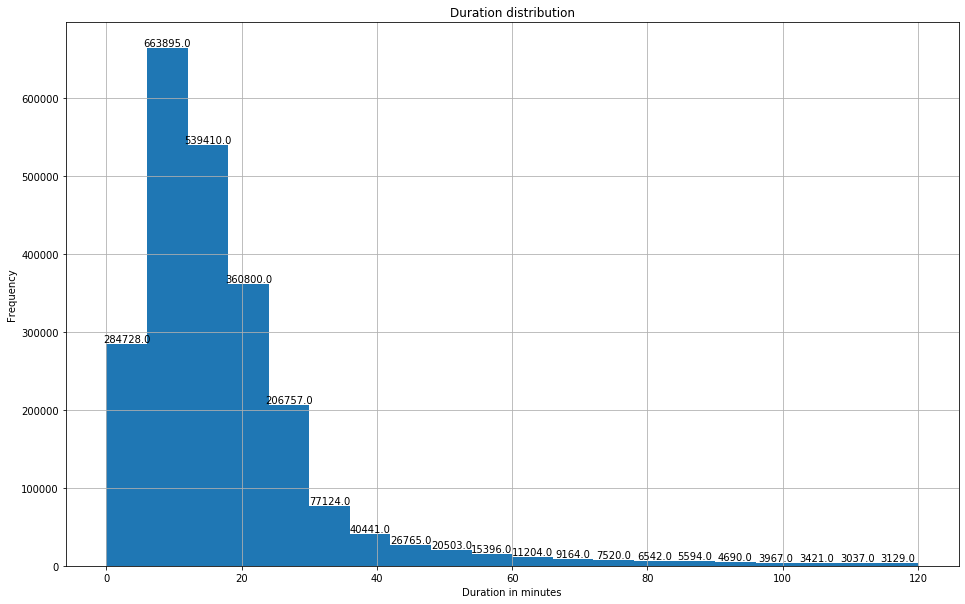

In [11]:
# leave only entries that are shorter than 2 hours and have valid duration
valid_df = df[(df['Duration'] >= 0) & (df['Duration'] <= 2 * 60 * 60)]
hist = valid_df['Duration'].map(lambda x: x / 60).hist(bins=20, figsize=(16,10))
print_hist_labels(hist)
df, valid_df = valid_df, None
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title('Duration distribution')

In [12]:
df['month'] = df['Start Date'].apply(lambda t: t.month)
df['weekday'] = df['Start Date'].apply(lambda t: t.weekday())
df['hour'] = df['Start Date'].apply(lambda t: t.hour)

Text(0.5, 1.0, 'Hour Sample Distribution')

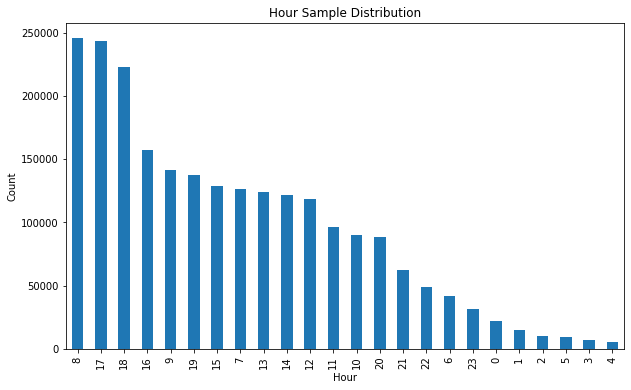

In [13]:
# how many shares per hour in total?
df['hour'].value_counts().plot(kind='bar', figsize=(10,6))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hour Sample Distribution')

Text(0.5, 1.0, 'Weekday Sample Distribution')

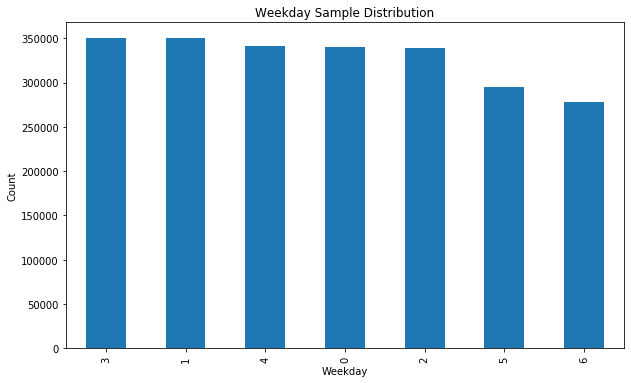

In [14]:
# how many shares per weekday in total?
df['weekday'].value_counts().plot(kind='bar', figsize=(10,6))
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Weekday Sample Distribution')

Text(0.5, 1.0, 'Month Sample Distribution')

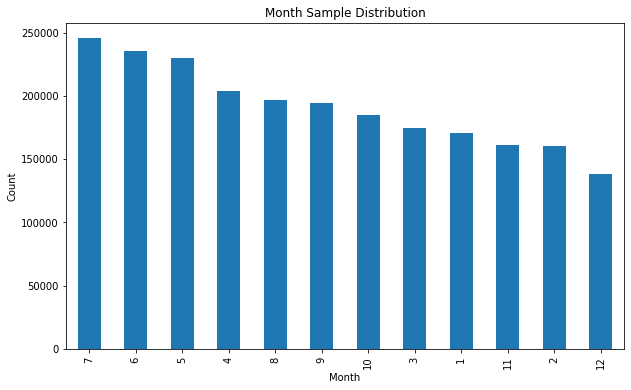

In [15]:
# how many shares per hour in total?
df['month'].value_counts().plot(kind='bar', figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Sample Distribution')

In [16]:
from configs import weather_data_csv
import json
holidays = 'holidays.csv'
hol_df = pd.read_csv(holidays, index_col='date', parse_dates=['date'])
weather_df = pd.read_csv(weather_data_csv, index_col='timestamp', parse_dates=['timestamp'])
weather_df.head()

,temperature,feelsLike,wind,weatherCode
timestamp,,,,
2015-01-01 00:00:00,3,-2,21,116
2015-01-01 01:00:00,3,-2,21,116
2015-01-01 02:00:00,3,-1,20,116
2015-01-01 03:00:00,3,-1,20,116
2015-01-01 04:00:00,4,0,20,116


In [17]:
# check if the start date hits on a holiday
hol_set= set(hol_df.index.map(lambda x: x.date()))
df['is_holiday'] = df['Start Date'].map(lambda x: x.date() in hol_set).map(lambda x: '1' if x else '0')

# check if start date hits on a weekend
# monday is 0, sunday is 6
df['is_weekend'] = df['Start Date'].map(lambda x: x.weekday() > 4).map(lambda x: '1' if x else '0')

In [18]:
from datetime import datetime
date_mapper = lambda x: pd.to_datetime(datetime(year=x.year, month=x.month, day=x.day, hour=x.hour))
df['Start Date'] = df['Start Date'].map(date_mapper)

In [30]:
share_df = df.groupby('Start Date').agg({'Start Date': 'count'}).rename(columns={'Start Date': 'share_count'})
share_df = share_df.join(weather_df)
share_df = share_df.reset_index()
# drop rows with missing data
print('Old size:', len(share_df))
share_df = share_df.dropna()
print('New size:', len(share_df))
share_df.head()

Old size: 39608
New size: 38033


,Start Date,share_count,temperature,feelsLike,wind,weatherCode
0,2015-01-02 00:00:00,14,10.0,7.0,35.0,122.0
1,2015-01-02 01:00:00,18,11.0,7.0,34.0,122.0
2,2015-01-02 02:00:00,11,11.0,8.0,32.0,122.0
3,2015-01-02 03:00:00,5,11.0,8.0,31.0,122.0
4,2015-01-02 04:00:00,2,11.0,8.0,26.0,122.0


In [34]:
share_df['month'] = share_df['Start Date'].apply(lambda t: t.month)
share_df['weekday'] = share_df['Start Date'].apply(lambda t: t.weekday())
share_df['hour'] = share_df['Start Date'].apply(lambda t: t.hour)
share_df['is_holiday'] = share_df['Start Date'].map(lambda x: x.date() in hol_set).map(lambda x: '1' if x else '0')
# check if start date hits on a weekend
# monday is 0, sunday is 6
share_df['is_weekend'] = share_df['Start Date'].map(lambda x: x.weekday() > 4).map(lambda x: '1' if x else '0')
share_df['weatherCode'] = share_df['weatherCode'].map(lambda x: str(int(x)))
print(share_df.dtypes)
share_df.head()

Start Date     datetime64[ns]
share_count             int64
temperature           float64
feelsLike             float64
wind                  float64
weatherCode            object
month                   int64
weekday                 int64
hour                    int64
is_holiday             object
is_weekend             object
dtype: object


,Start Date,share_count,temperature,feelsLike,wind,weatherCode,month,weekday,hour,is_holiday,is_weekend
0,2015-01-02 00:00:00,14,10.0,7.0,35.0,122,1,4,0,0,0
1,2015-01-02 01:00:00,18,11.0,7.0,34.0,122,1,4,1,0,0
2,2015-01-02 02:00:00,11,11.0,8.0,32.0,122,1,4,2,0,0
3,2015-01-02 03:00:00,5,11.0,8.0,31.0,122,1,4,3,0,0
4,2015-01-02 04:00:00,2,11.0,8.0,26.0,122,1,4,4,0,0


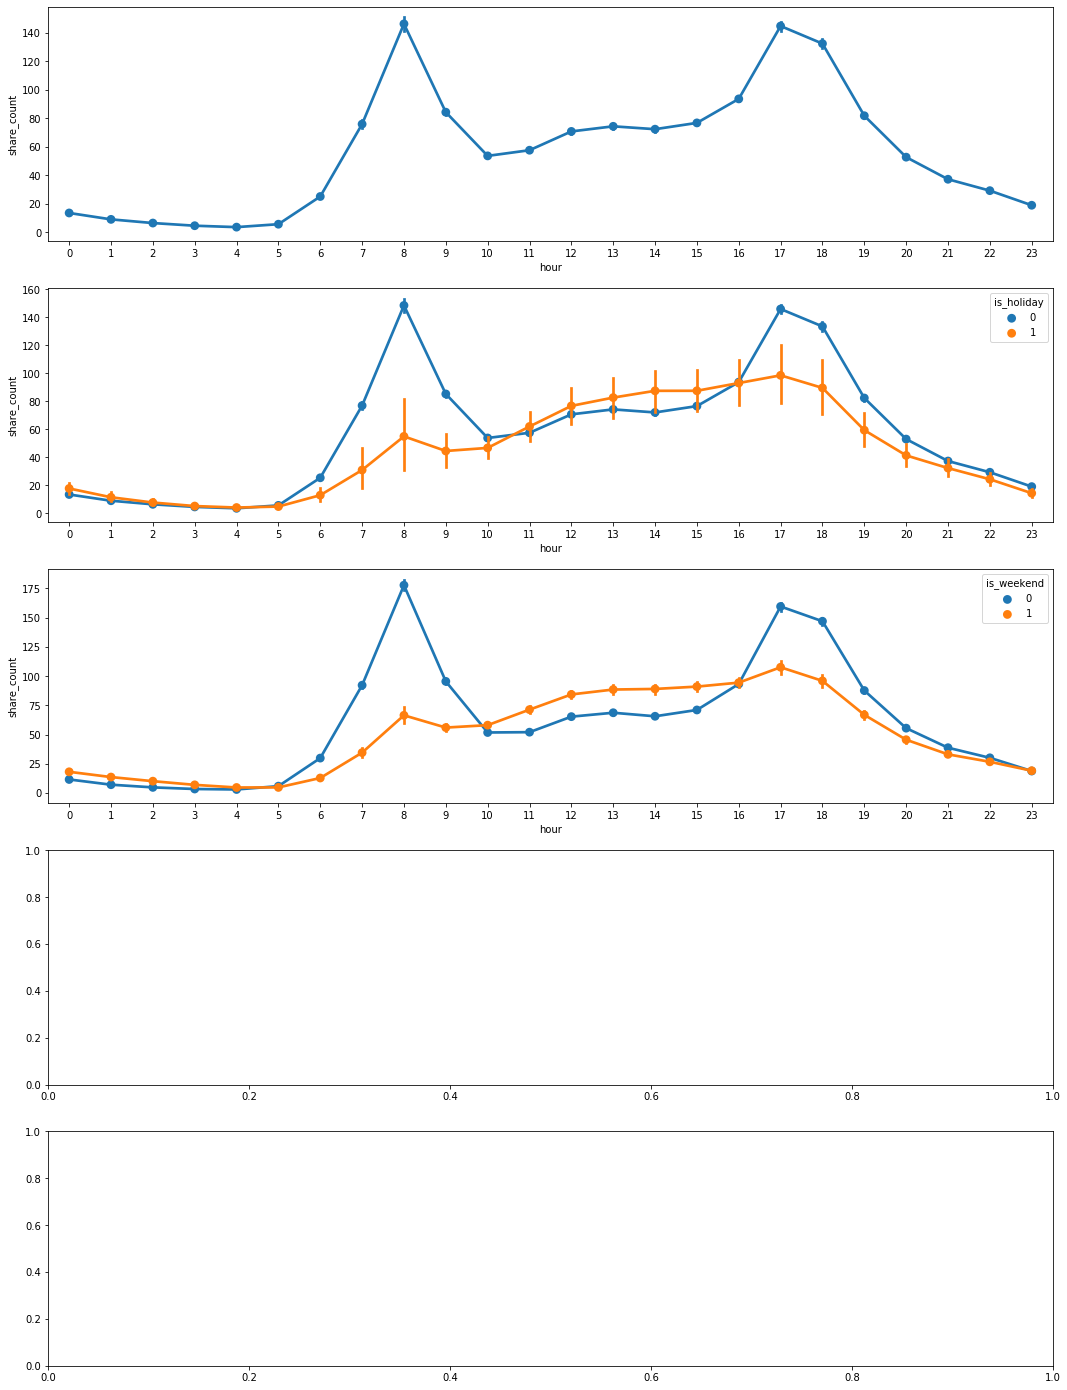

In [35]:
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)
data = share_df
sns.pointplot(data=data, x='hour', y='share_count', ax=ax1)
sns.pointplot(data=data, x='hour', y='share_count', hue='is_holiday', ax=ax2)
sns.pointplot(data=data, x='hour', y='share_count', hue='is_weekend', ax=ax3)
# sns.pointplot(data=data, x='hour', y='share_count', hue='temperature', ax=ax4)
# sns.pointplot(data=data, x='hour', y='share_count', hue='weatherCode', ax=ax5)

In [59]:
X = share_df.drop(axis=1, labels=['share_count', 'Start Date']).to_numpy()
Y = share_df['share_count'].to_numpy()
X.shape

(38033, 9)

In [60]:
X_train = X[:20000]
Y_train = Y[:20000]

X_val = X[20000:30000]
Y_val = Y[20000:30000]

X_test = X[30000:]
Y_test = Y[30000:]

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [67]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('NN (100, 100)', MLPClassifier(hidden_layer_sizes=(100, 100))),
    ('NN (50)', MLPClassifier(hidden_layer_sizes=(50)))
]

In [68]:
import time
for name, clf in classifiers:
    print(f'** {name}')
    t0 = time.time()
    clf.fit(X_train, Y_train)
    t1 = time.time()
    score_train = clf.score(X_train[:10000], Y_train[:10000])
    t2 = time.time()
    score_test = clf.score(X_test, Y_test)
    t3 = time.time()
    print(f'\tTraining time {t1 - t0:3.3f}')
    print(f'\tPrediction time (train) {t2 - t1:3.3f}')
    print(f'\tPrediction time (test) {t3 - t2:3.3f}')
    print(f'\tScore train: {score_train:.3f}\tScore Test: {score_test:.3f}')

** Decision Tree
	Training time 0.251
	Prediction time (train) 0.010
	Prediction time (test) 0.008
	Score train: 0.997	Score Test: 0.036
** Random Forest
	Training time 8.758
	Prediction time (train) 1.220
	Prediction time (test) 0.904
	Score train: 0.997	Score Test: 0.044
** NN (100, 100)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Training time 107.979
	Prediction time (train) 0.112
	Prediction time (test) 0.098
	Score train: 0.087	Score Test: 0.046
** NN (50)
	Training time 47.694
	Prediction time (train) 0.043
	Prediction time (test) 0.030
	Score train: 0.060	Score Test: 0.041


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
